In [2]:
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data/TableS1_HQ_filtered16S.csv")
data.head()

,assembly_accession,CheckM completeness,CheckM contamination,16S_ID,assembly_level,Sum,PKSI,PKSother,NRPS,RiPPs,Saccharides,Terpene,PKS-NRP_Hybrids,Others
0,GCF_000022305.1,100.0,0.67,refseq4905,Complete Genome,3,0,0,0,0,0,1,0,2
1,GCF_000025965.1,100.0,0.37,refseq15376,Complete Genome,7,0,0,0,0,0,1,0,6
2,GCF_000023105.1,100.0,0.84,refseq45559,Complete Genome,1,0,0,0,0,0,1,0,0
3,GCF_000012365.1,100.0,0.06,refseq128457,Complete Genome,20,1,0,5,3,0,2,2,7
4,GCF_000024165.1,100.0,0.88,refseq35003,Complete Genome,8,0,0,2,1,0,1,0,4


In [5]:
# 统计每个值的出现次数
value_counts = data['16S_ID'].value_counts()
# 找到只出现一次的值
values_once = value_counts[value_counts == 1]
values_once_count = values_once.sum()
# 找到出现多次的值
values_multiple = value_counts[value_counts > 1]
values_multiple_count = values_multiple.sum()
values_multiple_deduplicated_count = values_multiple.size
# 输出结果
print("只出现一次的值:", values_once_count)
print("出现多次的值:", values_multiple_count)

只出现一次的值: 42812
出现多次的值: 132509


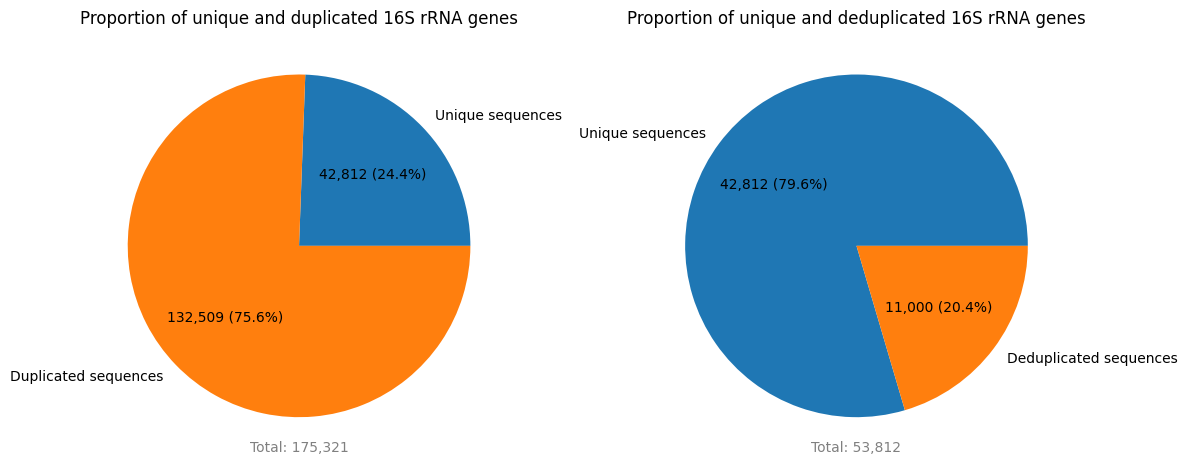

In [61]:
# 数据
# 第一张饼图的数据（原始值）
labels1 = ['Unique sequences', 'Duplicated sequences']
sizes1 = [values_once_count, values_multiple_count]  # 每部分的大小
colors1 = ['#1f77b4', '#ff7f0e']  # 蓝色和橙色

# 第二张饼图的数据（去重后的值）
labels2 = ['Unique sequences', 'Deduplicated sequences']
sizes2 = [values_once_count, values_multiple_deduplicated_count]
colors2 = ['#1f77b4', '#ff7f0e']  # 蓝色和深橙色

# 自定义函数，显示数值和百分比
def autopct_format(pct, all_vals):
    absolute = int(round(pct/100.*sum(all_vals)))  # 计算绝对值
    return f"{absolute:,.0f} ({pct:.1f}%)"  # 数值和百分比组合

# 创建图形
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 创建并排的两个子图

axes[0].pie(
    sizes1,
    startangle=0,
    labels=labels1,
    autopct=lambda pct: autopct_format(pct, sizes1),  # 使用自定义格式
)
axes[0].set_title('Proportion of unique and duplicated 16S rRNA genes')
# 在标题下方添加总计说明
axes[0].text(0, -1.2, f"Total: {sum(sizes1):,}", ha='center', color='gray')

axes[1].pie(
    sizes2,
    startangle=0,
    labels=labels2,
    autopct=lambda pct: autopct_format(pct, sizes2),  # 使用自定义格式
)
axes[1].set_title('Proportion of unique and deduplicated 16S rRNA genes')
# 在标题下方添加总计说明
axes[1].text(0, -1.2, f"Total: {sum(sizes2):,}", ha='center', color='gray')

# 调整布局
plt.tight_layout()

# 保存为高清 PNG 图片
fig.savefig("plot/pie_chart_of_unique_and_duplicated_16S.png", dpi=300, bbox_inches="tight")

plt.show()

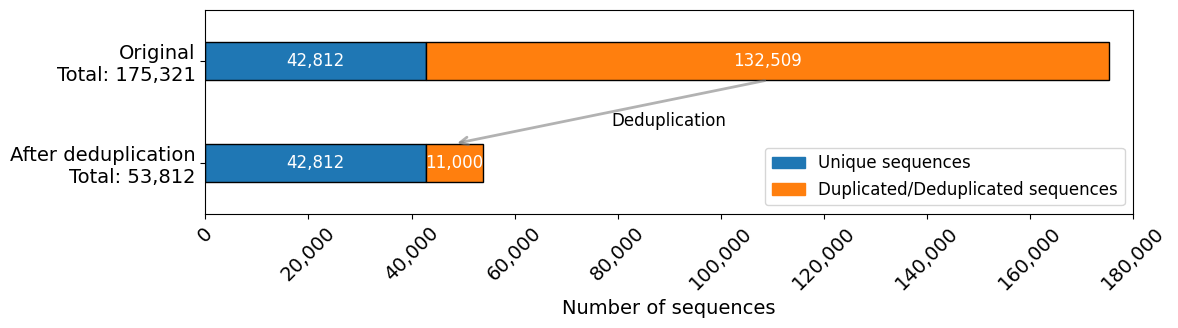

In [130]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# 设置全局字体大小
plt.rcParams.update({'font.size': 14})

# 数据
unique1 = values_once_count
duplicated1 = values_multiple_count
total1 = values_once_count + values_multiple_count

unique2 = values_once_count
deduplicated2 = values_multiple_deduplicated_count
total2 = values_once_count + values_multiple_deduplicated_count

# 颜色设置：蓝色为 Unique，橙色为 Duplicated/Deduplicated
colors = ['#1f77b4', '#ff7f0e']

# 创建画布
fig, ax = plt.subplots(figsize=(12, 3.5))

# 控制柱子高度
bar_height = 0.75  # 调小柱子高度
y1 = 1  # 调整第一行柱子的垂直位置
y2 = -1  # 调整第二行柱子的垂直位置

# 原始数据堆积柱（第一行）
ax.barh(y1, unique1, color=colors[0], edgecolor='black', height=bar_height)
ax.barh(y1, duplicated1, left=unique1, color=colors[1], edgecolor='black', height=bar_height)

# 去重后数据堆积柱（第二行）
ax.barh(y2, unique2, color=colors[0], edgecolor='black', height=bar_height)
ax.barh(y2, deduplicated2, left=unique2, color=colors[1], edgecolor='black', height=bar_height)

# 映射箭头（表示 duplicated → deduplicated 的关系）
arrowprops = dict(arrowstyle="->", color="gray", lw=2, alpha=0.6)
# 箭头终点
xy = (unique2 + deduplicated2 / 2, y2 + bar_height / 2)
# 箭头起点
xytext = (unique1 + duplicated1 / 2, y1 - bar_height / 2)
ax.annotate('', xy=xy, xytext=xytext, arrowprops=arrowprops)
# 计算箭头中间位置
mid_x = (xy[0] + xytext[0]) / 2
mid_y = (xy[1] + xytext[1]) / 2

# 在箭头中间添加文字注释
ax.annotate('Deduplication', xy=(mid_x, mid_y), 
            xytext=(0, 0), textcoords='offset points',
            ha='left', va='top', fontsize=12)


# 添加标签文字，并格式化千分位
ax.text(unique1 / 2, y1, f'{unique1:,}', va='center', ha='center', color='white', fontsize=12)
ax.text(unique1 + duplicated1 / 2, y1, f'{duplicated1:,}', va='center', ha='center', color='white', fontsize=12)
ax.text(unique2 / 2, y2, f'{unique2:,}', va='center', ha='center', color='white', fontsize=12)
ax.text(unique2 + deduplicated2 / 2, y2, f'{deduplicated2:,}', va='center', ha='center', color='white', fontsize=12)

# 设置 Y 轴标签
ax.set_yticks([y1, y2])
ax.set_yticklabels(['Original\nTotal: 175,321', 'After deduplication\nTotal: 53,812'])

# 自定义正方形图例
square_patch_unique = mpatches.Patch(color=colors[0], label='Unique sequences')
square_patch_duplicated = mpatches.Patch(color=colors[1], label='Duplicated/Deduplicated sequences')
ax.legend(handles=[square_patch_unique, square_patch_duplicated], loc='lower right', fontsize=12)

# 固定 X 轴范围
x_min = 0
x_max = 180000  # 根据数据情况设定合适的最大值
ax.set_xlim(x_min, x_max)

# 设置 X 轴刻度标签格式化
formatter = ticker.StrMethodFormatter('{x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# 旋转 X 轴标签 45 度
plt.xticks(rotation=45)

# 固定 Y 轴范围
y_min = -2
y_max = 2
ax.set_ylim(y_min, y_max)

# 其他美化设置
ax.set_xlabel('Number of sequences')
# ax.set_title('Stacked Bar Chart of 16S rRNA Genes') 
plt.tight_layout()

plt.savefig("plot/stacked_bar_chart_of_16S.png", dpi=300, bbox_inches="tight")

# 显示图像
plt.show()
    

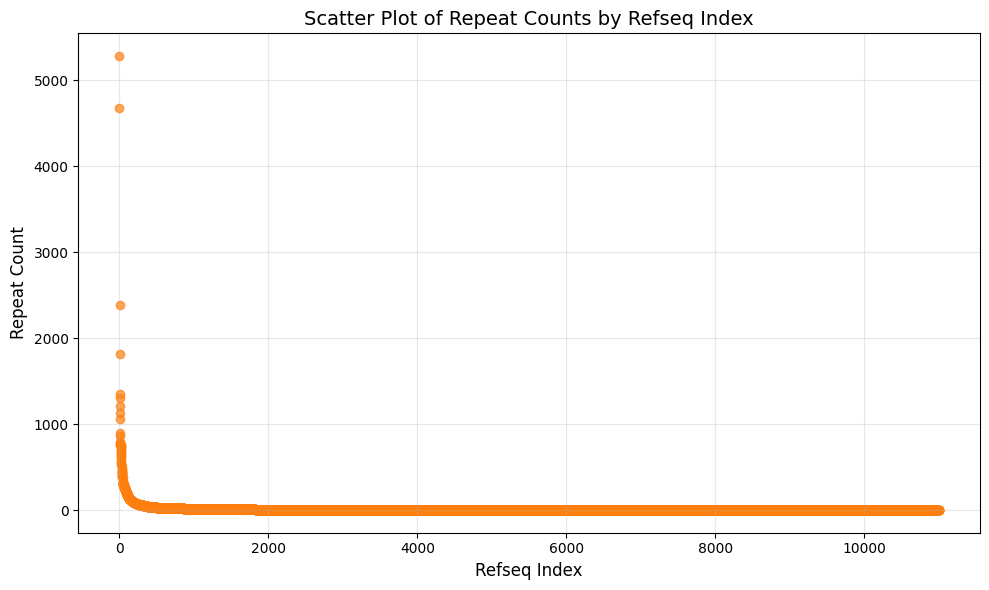

In [18]:
# 为每个 refseq 生成一个编号（索引从 1 开始）
indices = range(1, len(values_multiple) + 1)

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(indices, values_multiple.values, color='#FF7F0E', alpha=0.7)

# 添加标题和轴标签
plt.title('Scatter Plot of Repeat Counts by Refseq Index', fontsize=14)
plt.xlabel('Refseq Index', fontsize=12)
plt.ylabel('Repeat Count', fontsize=12)

# 添加网格
plt.grid(alpha=0.3)

# 显示图表
plt.tight_layout()
plt.show()

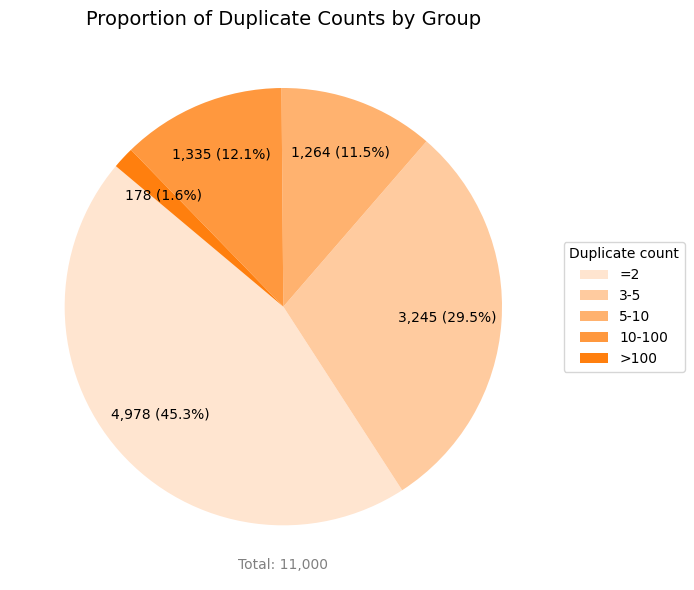

In [19]:
# 定义分组区间和标签
bins = [0, 2, 5, 10, 100, float('inf')]
labels = ['=2', '3-5', '5-10', '10-100', '>100']

# 计算每个值所属的分组
grouped = pd.cut(values_multiple, bins=bins, labels=labels, right=True)

# 按分组汇总重复次数的总和
grouped_counts = grouped.value_counts(sort=False)

# 创建渐变色
base_color = "#FF7F0E"  # 主色调橙色
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#FFE5D0", base_color])
colors = [cmap(i / (len(grouped_counts) - 1)) for i in range(len(grouped_counts))]

# 自定义函数，显示数值和百分比
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))  # 计算绝对值
    return f"{absolute:,} ({pct:.1f}%)"  # 数值和百分比组合

# 绘制饼图
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    grouped_counts,
    autopct=lambda pct: autopct_format(pct, grouped_counts),  # 使用自定义格式
    startangle=140,  # 起始角度
    colors=colors,   # 渐变色
    pctdistance=0.75  # 百分比距离圆心的距离
)

# 添加图例在右侧
ax.legend(
    wedges, 
    grouped_counts.index, 
    title="Duplicate count", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# 添加标题
plt.title('Proportion of Duplicate Counts by Group', fontsize=14)

# 计算总计并在标题下方显示
total = len(grouped)
plt.text(0, -1.2, f"Total: {total:,}", ha='center', color='gray')

# 显示图表
plt.ylabel('')  # 去掉默认的 y 轴标签
plt.tight_layout()
plt.show()

/var/folders/3c/v18vsqt50jzgnmgzv858z_rm0000gn/T/ipykernel_67260/1407459985.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


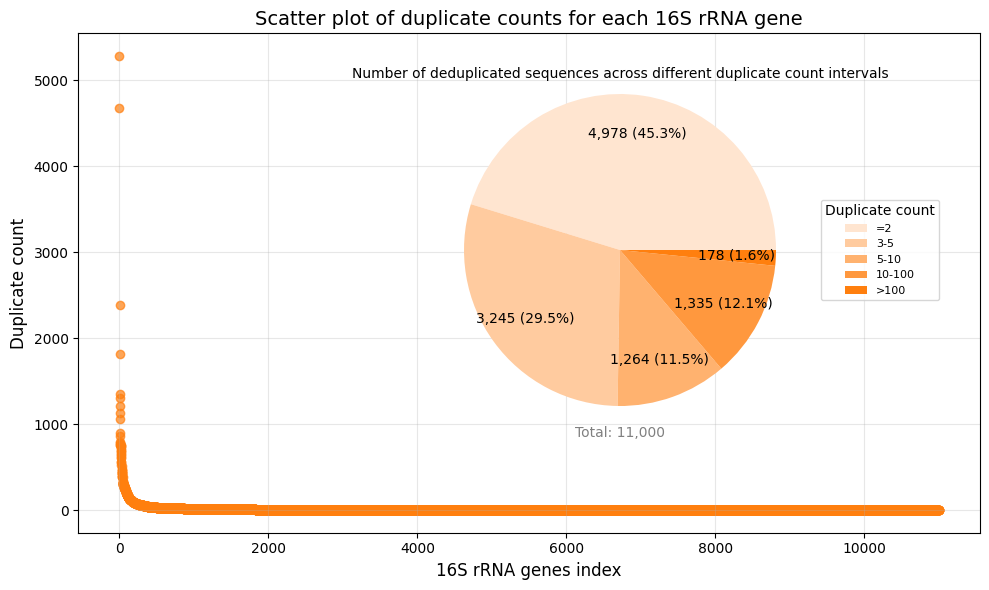

In [20]:
# 第一张图数据
indices = range(1, len(values_multiple) + 1)

# 第二张图数据
bins = [0, 2, 5, 10, 100, float('inf')]
labels = ['=2', '3-5', '5-10', '10-100', '>100']
grouped = pd.cut(values_multiple, bins=bins, labels=labels, right=True)
grouped_counts = grouped.value_counts(sort=False)

# 创建渐变色
base_color = "#FF7F0E"  # 主色调橙色
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["#FFE5D0", base_color])
colors = [cmap(i / (len(grouped_counts) - 1)) for i in range(len(grouped_counts))]

# 自定义函数，显示数值和百分比
def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))  # 计算绝对值
    return f"{absolute:,} ({pct:.1f}%)"  # 数值和百分比组合

# 创建主图（第一张图）
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.scatter(indices, values_multiple.values, color='#FF7F0E', alpha=0.7)
ax1.set_title('Scatter plot of duplicate counts for each 16S rRNA gene', fontsize=14)
ax1.set_xlabel('16S rRNA genes index', fontsize=12)
ax1.set_ylabel('Duplicate count', fontsize=12)
ax1.grid(alpha=0.3)

# 在主图的右上角添加插图（第二张图）
inset_ax = fig.add_axes([0.3, 0.25, 0.65, 0.65])  # [左, 下, 宽度, 高度]
wedges, texts, autotexts = inset_ax.pie(
    grouped_counts,
    autopct=lambda pct: autopct_format(pct, grouped_counts),  # 使用自定义格式
    startangle=0,  # 起始角度
    colors=colors,   # 渐变色
    pctdistance=0.75  # 百分比距离圆心的距离
)

# 插图标题和图例
inset_ax.set_title('Number of deduplicated sequences across different duplicate count intervals', fontsize=10, y=0.92)
total = len(grouped)
inset_ax.text(0, -1.2, f"Total: {total:,}", ha='center', color='gray')
inset_ax.legend(
    wedges, 
    grouped_counts.index, 
    loc='center left', 
    fontsize=8, 
    bbox_to_anchor=(1, 0.5),  # 调整位置
    title="Duplicate count"
)

# 调整布局
plt.tight_layout()

# 保存为高清 PNG 图片
fig.savefig("../plot/scatter_plot_of_duplicate_counts_for_each_16S.png", dpi=300, bbox_inches="tight")

plt.show()

In [21]:
groups = data.groupby(by="16S_ID")
filtered_data = groups.filter(lambda x: len(x) > 1)
filtered_groups = filtered_data.groupby(by="16S_ID")
result = filtered_groups[["Sum", "PKSI", "PKSother", "NRPS", "RiPPs", "Saccharides", "Terpene", "PKS-NRP_Hybrids", "Others"]].std()
result

,Sum,PKSI,PKSother,NRPS,RiPPs,Saccharides,Terpene,PKS-NRP_Hybrids,Others
16S_ID,,,,,,,,,
refseq1,0.730614,0.019455,0.33721,0.117164,0.566016,0.0,0.325943,0.023825,0.365451
refseq10,1.077500,0.000000,0.00000,0.000000,1.077500,0.0,0.000000,0.000000,0.000000
refseq100,0.937117,0.000000,0.00000,0.216930,0.584845,0.0,0.000000,0.319136,0.517363
refseq1000,1.274018,0.000000,0.00000,0.458487,0.276725,0.0,0.000000,0.000000,0.973369
refseq10001,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
refseq9979,1.500000,0.000000,0.00000,0.500000,0.000000,0.0,0.000000,1.154701,0.000000
refseq998,0.810643,0.000000,0.00000,0.483046,0.000000,0.0,0.000000,0.462910,0.589592
refseq9993,0.894427,0.000000,0.00000,0.447214,0.447214,0.0,0.447214,0.000000,0.894427


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def draw_boxplot_with_outliers(ax, data, level):
    """
    绘制箱线图并标注每列异常值的占比。
    """
    columns=["Sum", "PKSI", "PKSother", "NRPS", "RiPPs", 
            "Saccharides", "Terpene", "PKS-NRP_Hybrids", "Others"]
    # 计算异常值占比
    outlier_ratios = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)  # 第 1 四分位数
        Q3 = data[col].quantile(0.75)  # 第 3 四分位数
        IQR = Q3 - Q1  # 四分位距
        lower_bound = Q1 - 1.5 * IQR  # 下边界
        upper_bound = Q3 + 1.5 * IQR  # 上边界
        # 筛选异常值
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
        # 计算异常值占比
        outlier_ratios[col] = len(outliers) / len(data[col])
    
    # 绘制箱线图
    ylim = (-5, 45)
    ax.set_ylim(ylim)

    # 绘制箱线图，调整异常值点大小
    boxprops = dict(linestyle='-', linewidth=1)  # 箱体线宽
    flierprops = dict(marker='o', markersize=3, color='red', alpha=0.5)  # 异常值点样式
    whiskerprops = dict(linewidth=1)  # 须线宽度
    capprops = dict(linewidth=1)  # 须端线宽度

    # 绘制箱线图
    data.boxplot(column=columns, ax=ax,
                 boxprops=boxprops, flierprops=flierprops,
                 whiskerprops=whiskerprops, capprops=capprops, grid=False)

    # 标注每列的异常值占比和平均值
    for i, col in enumerate(columns, start=1):  # i 从 1 开始，因为箱线图列从 1 开始
        # 标注异常值占比
        outlier_ratio = outlier_ratios[col] * 100  # 转换为百分比
        ax.text(i, ylim[1] * 0.80, f"{outlier_ratio:.2f}%", 
                ha="center", fontsize=10, color="red")
        
        # 标注平均值在异常值占比的上方
        mean_value = data[col].mean()  # 计算平均值
        ax.text(i, ylim[1] * 0.92, f"{mean_value:.2f}",  # 将平均值放在 95% 高度
                ha="center", fontsize=10, color="blue")
    
    # 设置标题和标签
    level_info = " + ".join(level)
    ax.set_title(f"Boxplot with Outlier Ratios ({level_info})", fontsize=16)
    ax.set_ylabel("SD", fontsize=14)
    ax.tick_params(axis="x", labelrotation=45, labelsize=12)
    ax.tick_params(axis="y", labelsize=12)
    
    

In [23]:
def gen_std_data(data, target_level):
    groups = data[data["assembly_level"].isin(target_level)].groupby(by="16S_ID")
    filtered_data = groups.filter(lambda x: len(x) > 1)
    filtered_groups = filtered_data.groupby(by="16S_ID")
    result = filtered_groups[["Sum", "PKSI", "PKSother", "NRPS", "RiPPs", "Saccharides", "Terpene", "PKS-NRP_Hybrids", "Others"]].std()
    return result

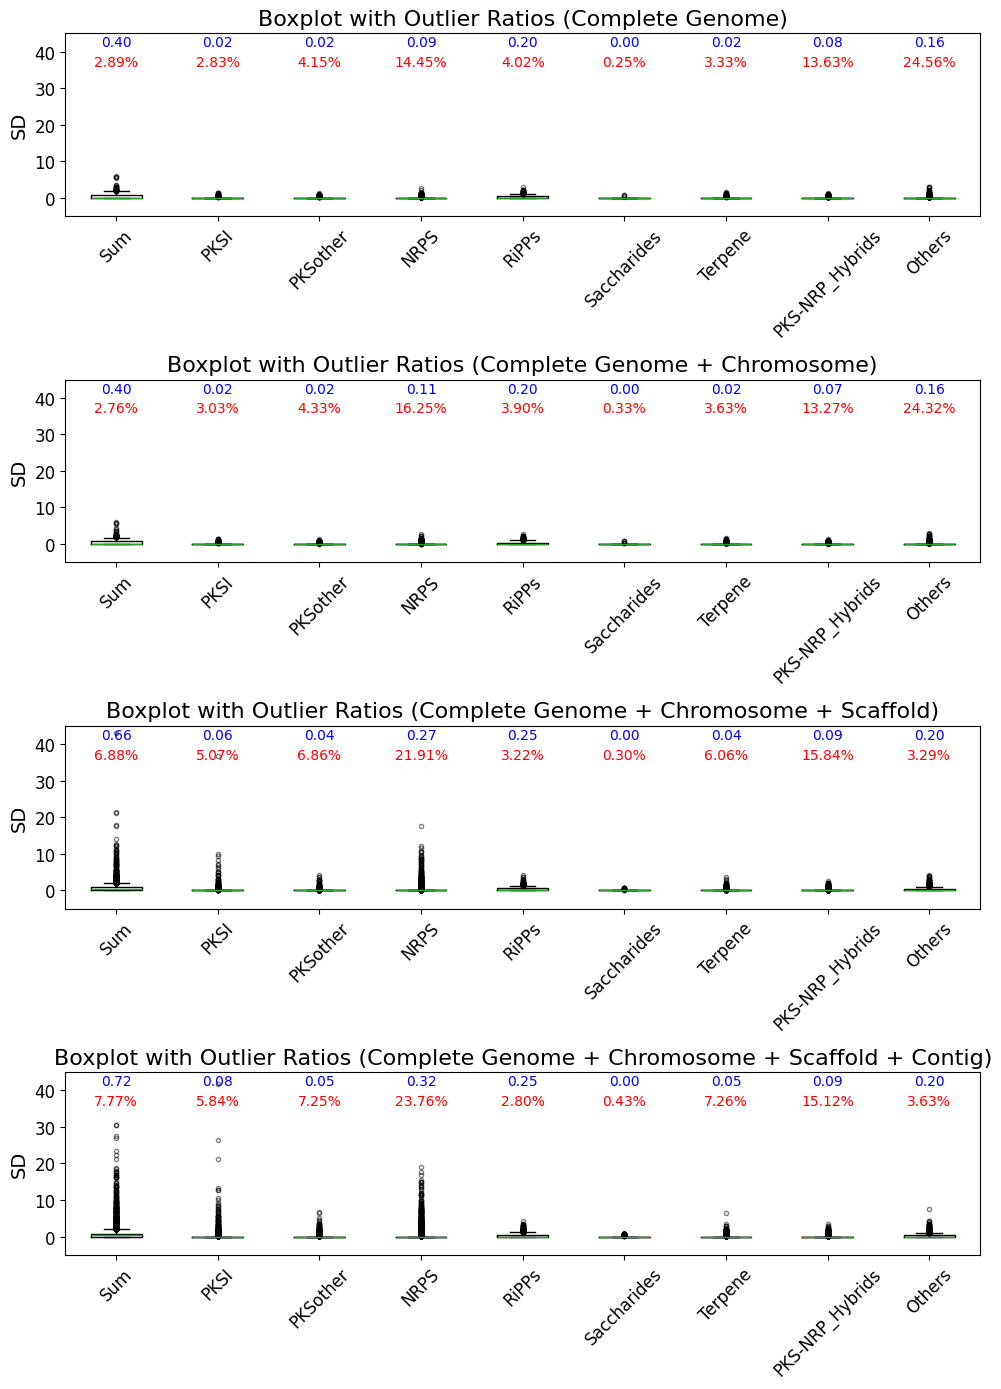

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 14))
# 循环生成子图
assembly_levels = ["Complete Genome", "Chromosome", "Scaffold", "Contig"]
for i, ax in enumerate(axes):
    target_level = assembly_levels[:i+1]
    std_data = gen_std_data(data, target_level)  # 生成标准差数据
    draw_boxplot_with_outliers(ax, std_data, target_level)

# 调整布局
plt.tight_layout()

# 保存为高清 PNG 图片
fig.savefig("../plot/boxplot_SD_of_BGC_counts_under_same_16S.png", dpi=300, bbox_inches="tight")

plt.show()